### Sequence diversity comparison

   kmer  Diversity
0  3mer   6.000000
1  5mer  10.000000
2  7mer  12.860117
3  9mer  13.223097


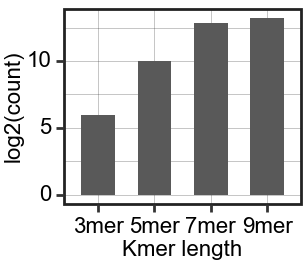

In [4]:
#curlcake
import pandas as pd
from plotnine import *
import numpy as np


ref_culrcake="/home/wuyou/Projects/m6A/data/GSE124309_FASTA_sequences_of_Curlcakes.txt"
#ref_culrcake="/home/wuyou/Projects/paper/data/ELIGOS.fasta"
with open(ref_culrcake) as f:

    curlcake_A_3mer=[]
    curlcake_A_5mer=[]
    curlcake_A_7mer=[]
    curlcake_A_9mer=[]
    
    for line in f:
        if ">" in line:
            continue
        line=line.strip()

        for i in range(1,len(line)-1):
            if line[i-1:i+2] not in curlcake_A_3mer:
                curlcake_A_3mer.append(line[i-1:i+2])
                
        for i in range(2,len(line)-2):
            if line[i-2:i+3] not in curlcake_A_5mer:
                curlcake_A_5mer.append(line[i-2:i+3])
        
        for i in range(3,len(line)-3):
            if line[i-3:i+4] not in curlcake_A_7mer:
                curlcake_A_7mer.append(line[i-3:i+4])
                
        for i in range(4,len(line)-4):
            if line[i-4:i+5] not in curlcake_A_9mer:
                curlcake_A_9mer.append(line[i-4:i+5])



black = '#222222'
gray = '#666666'
red = '#FF3333'
green = '#66CC00'
blue = '#3333FF'
purple = '#9933FF'
orange = '#FF8000'
yellow = '#FFFF33'

c1="#F8766D"
c2="#00BA38"
c3="#619CFF"

X_curcake=["3mer","5mer","7mer","9mer"]
Y_curcake=[len(curlcake_A_3mer),len(curlcake_A_5mer),len(curlcake_A_7mer),len(curlcake_A_9mer)]
X=X_curcake
Y=np.log2(Y_curcake)
data=pd.DataFrame(dict(kmer=X,Diversity=Y)) 
print(data)
p1 = (ggplot()
        +geom_bar(data,aes(x="kmer",y = "Diversity"),stat="identity",width=0.6)
        
        +theme(panel_background=element_rect(fill=gray, alpha=0),
            panel_grid_major=element_line(size=0.3, alpha=0.3,color=black),
            panel_grid_minor=element_line(size=0.3, alpha=0.3,color=black),
            panel_border=element_rect(color=black, size=1),
            axis_text=element_text(size=8,family="Arial",color="black"),
            axis_title_x=element_text(size=8,family="Arial",color="black"),
            axis_title_y=element_text(size=8,family="Arial",color="black"),
            #axis_text_x=element_text(rotation=45, hjust=0.5),
            figure_size=[1.52,1.33],
            legend_title = element_text(size=6), #change legend title font size
            legend_text = element_text(size=6),
            legend_background=element_rect(size=0.5,alpha=0),
            legend_position=(0.60,0.4),
            legend_key_size=4) #change legend text font size
        +labs(x = "Kmer length", y ="log2(count)")
        +guides(color = guide_legend(title = "Probability cutoff"))

    )
print(p1)

   kmer  Diversity label
0  3mer   1.000000     2
1  5mer   1.000000     2
2  7mer   0.453796     2
3  9mer   0.036476     2
4  3mer   0.000000     1
5  5mer   0.000000     1
6  7mer   0.546204     1
7  9mer   0.963524     1


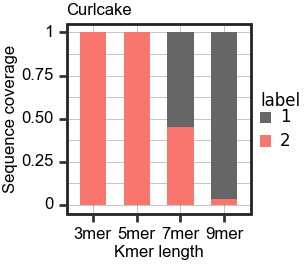

/home/wuyou/.conda/envs/sc/lib/python3.8/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 1.52 x 1.33 in image.
/home/wuyou/.conda/envs/sc/lib/python3.8/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: figure/figure_3c_sequence_diversity_curlcake.pdf


In [5]:
X_curcake=["3mer","5mer","7mer","9mer","3mer","5mer","7mer","9mer"]
Y_curcake=[len(curlcake_A_3mer)/4**3,len(curlcake_A_5mer)/4**5,len(curlcake_A_7mer)/4**7,len(curlcake_A_9mer)/4**9]
Y_curcake.extend([1-len(curlcake_A_3mer)/4**3,1-len(curlcake_A_5mer)/4**5,1-len(curlcake_A_7mer)/4**7,1-len(curlcake_A_9mer)/4**9])
label=["2","2","2","2","1","1","1","1"]
X=X_curcake
Y=Y_curcake
#Y=np.log2(Y_curcake)
data=pd.DataFrame(dict(kmer=X,Diversity=Y,label=label)) 
print(data)
p1 = (ggplot()
        +geom_bar(data,aes(x="kmer",y = "Diversity",fill="label"),stat="identity",position="stack",width=0.6)
        +scale_fill_manual(values=[gray,c1])
        +theme(panel_background=element_rect(fill=gray, alpha=0),
            panel_grid_major=element_line(size=0.3, alpha=0.3,color=black),
            panel_grid_minor=element_line(size=0.3, alpha=0.3,color=black),
            panel_border=element_rect(color=black, size=1),
            axis_text=element_text(size=6,family="Arial",color="black"),
            axis_title_x=element_text(size=6,family="Arial",color="black"),
            axis_title_y=element_text(size=6,family="Arial",color="black"),
            
            #axis_text_x=element_text(rotation=45, hjust=0.5),
            figure_size=[1.52,1.33],
            legend_title = element_text(size=6), #change legend title font size
            legend_text = element_text(size=6),
            legend_background=element_rect(size=0.5,alpha=0),
            #legend_position=(0.60,0.4),
               
            plot_title=element_text(margin={'b': 1, 'r': 0, 'units': 'pt'},size=6,family="Arial",color="black"),
            
            legend_position=None,
            legend_key_size=4) #change legend text font size
        +labs(x = "Kmer length", y ="Sequence coverage")
        +guides(color = guide_legend(title = "Probability cutoff"))
        + ggtitle("Curlcake")
    )
print(p1)
p1.save('figure/figure_3c_sequence_diversity_curlcake.pdf')

   kmer  Diversity
0  3mer   6.000000
1  5mer  10.000000
2  7mer  12.835656
3  9mer  13.308339


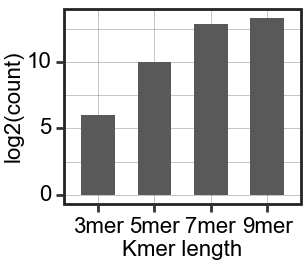

In [7]:
#ELIGOS


ref_culrcake="/home/wuyou/Projects/paper/data/ELIGOS.fasta"
with open(ref_culrcake) as f:
    curlcake_A_3mer=[]
    curlcake_A_5mer=[]
    curlcake_A_7mer=[]
    curlcake_A_9mer=[]
    
    for line in f:
        if ">" in line:
            continue
        line=line.strip()
        

        for i in range(1,len(line)-1):
            if line[i-1:i+2] not in curlcake_A_3mer:
                curlcake_A_3mer.append(line[i-1:i+2])
                
        for i in range(2,len(line)-2):
            if line[i-2:i+3] not in curlcake_A_5mer:
                curlcake_A_5mer.append(line[i-2:i+3])
        
        for i in range(3,len(line)-3):
            if line[i-3:i+4] not in curlcake_A_7mer:
                curlcake_A_7mer.append(line[i-3:i+4])
                
        for i in range(4,len(line)-4):
            if line[i-4:i+5] not in curlcake_A_9mer:
                curlcake_A_9mer.append(line[i-4:i+5])

X_ELIGOS=["3mer","5mer","7mer","9mer"]
Y_ELIGOS=[len(curlcake_A_3mer),len(curlcake_A_5mer),len(curlcake_A_7mer),len(curlcake_A_9mer)]

X=X_ELIGOS
Y=np.log2(Y_ELIGOS)

data=pd.DataFrame(dict(kmer=X,Diversity=Y)) 
print(data)
p1 = (ggplot()
        +geom_bar(data,aes(x="kmer",y = "Diversity"),stat="identity",width=0.6)
        
        +theme(panel_background=element_rect(fill=gray, alpha=0),
            panel_grid_major=element_line(size=0.3, alpha=0.3,color=black),
            panel_grid_minor=element_line(size=0.3, alpha=0.3,color=black),
            panel_border=element_rect(color=black, size=1),
            axis_text=element_text(size=8,family="Arial",color="black"),
            axis_title_x=element_text(size=8,family="Arial",color="black"),
            axis_title_y=element_text(size=8,family="Arial",color="black"),
            #axis_text_x=element_text(rotation=45, hjust=0.5),
            figure_size=[1.52,1.33],
            legend_title = element_text(size=6), #change legend title font size
            legend_text = element_text(size=6),
            legend_background=element_rect(size=0.5,alpha=0),
            legend_position=(0.60,0.4),
            legend_key_size=4) #change legend text font size
        +labs(x = "Kmer length", y ="log2(count)")
        +guides(color = guide_legend(title = "Probability cutoff"))

)
print(p1)

   kmer  Diversity label
0  3mer   1.000000     2
1  5mer   1.000000     2
2  7mer   0.446167     2
3  9mer   0.038696     2
4  3mer   0.000000     1
5  5mer   0.000000     1
6  7mer   0.553833     1
7  9mer   0.961304     1


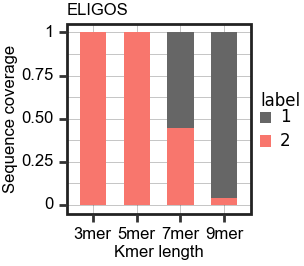

/home/wuyou/.conda/envs/sc/lib/python3.8/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 1.52 x 1.33 in image.
/home/wuyou/.conda/envs/sc/lib/python3.8/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: figure/figure_3c_sequence_diversity_ELIGOS.pdf


In [8]:
X_curcake=["3mer","5mer","7mer","9mer","3mer","5mer","7mer","9mer"]
Y_curcake=[len(curlcake_A_3mer)/4**3,len(curlcake_A_5mer)/4**5,len(curlcake_A_7mer)/4**7,len(curlcake_A_9mer)/4**9]
Y_curcake.extend([1-len(curlcake_A_3mer)/4**3,1-len(curlcake_A_5mer)/4**5,1-len(curlcake_A_7mer)/4**7,1-len(curlcake_A_9mer)/4**9])
label=["2","2","2","2","1","1","1","1"]
X=X_curcake
Y=Y_curcake
#Y=np.log2(Y_curcake)
data=pd.DataFrame(dict(kmer=X,Diversity=Y,label=label)) 
print(data)
p1 = (ggplot()
        +geom_bar(data,aes(x="kmer",y = "Diversity",fill="label"),stat="identity",position="stack",width=0.6)
        +scale_fill_manual(values=[gray,c1])
        +theme(panel_background=element_rect(fill=gray, alpha=0),
            panel_grid_major=element_line(size=0.3, alpha=0.3,color=black),
            panel_grid_minor=element_line(size=0.3, alpha=0.3,color=black),
            panel_border=element_rect(color=black, size=1),
            axis_text=element_text(size=6,family="Arial",color="black"),
            axis_title_x=element_text(size=6,family="Arial",color="black"),
            axis_title_y=element_text(size=6,family="Arial",color="black"),
            
            #axis_text_x=element_text(rotation=45, hjust=0.5),
            figure_size=[1.52,1.33],
            legend_title = element_text(size=6), #change legend title font size
            legend_text = element_text(size=6),
            legend_background=element_rect(size=0.5,alpha=0),
            #legend_position=(0.60,0.4),
               
            plot_title=element_text(margin={'b': 1, 'r': 0, 'units': 'pt'},size=6,family="Arial",color="black"),
            
            legend_position=None,
            legend_key_size=4) #change legend text font size
        +labs(x = "Kmer length", y ="Sequence coverage")
        +guides(color = guide_legend(title = "Probability cutoff"))
        + ggtitle("ELIGOS")
    )
print(p1)
p1.save('figure/figure_3c_sequence_diversity_ELIGOS.pdf')

In [10]:
#TandemMod  IVET

sam_file="/home/wuyou/Projects//Os_AD/data/unmod.sorted.sam"
with open(sam_file) as f:
    count_dict_unmod={}
    mapped_reads_count=0
    for line in f:
        contig=line.split("\t")[2]
        flag=line.split("\t")[1]
        if flag!="0":
            continue
        if contig not in count_dict_unmod:
            count_dict_unmod[contig]=0
        count_dict_unmod[contig]+=1

sam_file="/home/wuyou/Projects//Os_AD/data/m1A.sorted.sam"
with open(sam_file) as f:
    count_dict_m1A={}
    mapped_reads_count=0
    for line in f:
        contig=line.split("\t")[2]
        flag=line.split("\t")[1]
        if flag!="0":
            continue
        if contig not in count_dict_m1A:
            count_dict_m1A[contig]=0
        count_dict_m1A[contig]+=1

sam_file="/home/wuyou/Projects//Os_AD/data/m6A.sorted.sam"
with open(sam_file) as f:
    count_dict_m6A={}
    mapped_reads_count=0
    for line in f:
        contig=line.split("\t")[2]
        flag=line.split("\t")[1]
        if flag!="0":
            continue
        if contig not in count_dict_m6A:
            count_dict_m6A[contig]=0
        count_dict_m6A[contig]+=1    
    
sam_file="/home/wuyou/Projects//Os_AD/data/m5C.sorted.sam"
with open(sam_file) as f:
    count_dict_m5C={}
    mapped_reads_count=0
    for line in f:
        contig=line.split("\t")[2]
        flag=line.split("\t")[1]
        if flag!="0":
            continue
        if contig not in count_dict_m5C:
            count_dict_m5C[contig]=0
        count_dict_m5C[contig]+=1 
    

count_dict_overlap={}

for contig in count_dict_unmod:

    if contig not in count_dict_overlap:
        count_dict_overlap[contig]=[0]*4
    count_dict_overlap[contig][0]=count_dict_unmod[contig]
    
for contig in count_dict_m1A:

    if contig not in count_dict_overlap:
        count_dict_overlap[contig]=[0]*4

    count_dict_overlap[contig][1]=count_dict_m1A[contig]


for contig in count_dict_m6A:

    if contig not in count_dict_overlap:
        count_dict_overlap[contig]=[0]*4
    count_dict_overlap[contig][2]=count_dict_m6A[contig]

for contig in count_dict_m5C:

    if contig not in count_dict_overlap:

        count_dict_overlap[contig]=[0]*4
    count_dict_overlap[contig][3]=count_dict_m5C[contig]

count=0

contig_list=[]
for contig in count_dict_overlap:

    if count_dict_overlap[contig][0]<5 or count_dict_overlap[contig][1]<5 or count_dict_overlap[contig][2]<5 or count_dict_overlap[contig][3]<5:
        contig_list.append(contig)
        continue
    count+=1
max=0
for contig in contig_list:
    count_dict_overlap.pop(contig)


with open("/home/wuyou/Projects/Os_AD/data/unmod.signal.tsv") as f:
    curlcake_A_1mer={}
    curlcake_A_3mer={}
    curlcake_A_5mer={} 
    curlcake_A_7mer={}
    curlcake_A_9mer={}
    
    for line in f:
        contig=line.split("\t")[1]
        if contig not in count_dict_overlap:
            continue
        seq=line.split("\t")[3]
        line=seq
        for i in range(len(line)):
            if line[i] not in curlcake_A_1mer:
                curlcake_A_1mer[line[i]]=1

        for i in range(1,len(line)-1):
            if line[i-1:i+2] not in curlcake_A_3mer:
                curlcake_A_3mer[line[i-1:i+2]]=1
                
        for i in range(2,len(line)-2):
            if line[i-2:i+3] not in curlcake_A_5mer:
                curlcake_A_5mer[line[i-2:i+3]]=1
        
        for i in range(3,len(line)-3):
            if line[i-3:i+4] not in curlcake_A_7mer:
                curlcake_A_7mer[line[i-3:i+4]]=1
                
        for i in range(4,len(line)-4):
            if line[i-4:i+5] not in curlcake_A_9mer:
                curlcake_A_9mer[line[i-4:i+5]]=1


X_Os_AD=["3mer","5mer","7mer","9mer"]
Y_Os_AD=[len(curlcake_A_3mer),len(curlcake_A_5mer),len(curlcake_A_7mer),len(curlcake_A_9mer)]

X=X_Os_AD
Y=np.log2(Y_Os_AD)
data=pd.DataFrame(dict(kmer=X,Diversity=Y)) 
print(data)
p1 = (ggplot()
        +geom_bar(data,aes(x="kmer",y = "Diversity"),stat="identity",width=0.6)
        
        +theme(panel_background=element_rect(fill=gray, alpha=0),
            panel_grid_major=element_line(size=0.3, alpha=0.3,color=black),
            panel_grid_minor=element_line(size=0.3, alpha=0.3,color=black),
            panel_border=element_rect(color=black, size=1),
            axis_text=element_text(size=6,family="Arial",color="black"),
            axis_title_x=element_text(size=6,family="Arial",color="black"),
            axis_title_y=element_text(size=6,family="Arial",color="black"),
            #axis_text_x=element_text(rotation=45, hjust=0.5),
            figure_size=[1.52,1.33],
            legend_title = element_text(size=6), #change legend title font size
            legend_text = element_text(size=6),
            legend_background=element_rect(size=0.5,alpha=0),
            legend_position=(0.60,0.4),
            legend_key_size=4) #change legend text font size
        +labs(x = "Kmer length", y ="log2(count)")
        +guides(color = guide_legend(title = "Probability cutoff"))

)
print(p1)

   kmer  Diversity label
0  3mer   1.000000     2
1  5mer   1.000000     2
2  7mer   1.000000     2
3  9mer   0.900364     2
4  3mer   0.000000     1
5  5mer   0.000000     1
6  7mer   0.000000     1
7  9mer   0.099636     1


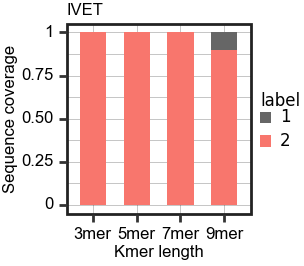

/home/wuyou/.conda/envs/sc/lib/python3.8/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 1.52 x 1.33 in image.
/home/wuyou/.conda/envs/sc/lib/python3.8/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: figure/figure_3c_sequence_diversity_IVET.pdf


In [11]:
X_curcake=["3mer","5mer","7mer","9mer","3mer","5mer","7mer","9mer"]
Y_curcake=[len(curlcake_A_3mer)/4**3,len(curlcake_A_5mer)/4**5,len(curlcake_A_7mer)/4**7,len(curlcake_A_9mer)/4**9]
Y_curcake.extend([1-len(curlcake_A_3mer)/4**3,1-len(curlcake_A_5mer)/4**5,1-len(curlcake_A_7mer)/4**7,1-len(curlcake_A_9mer)/4**9])
label=["2","2","2","2","1","1","1","1"]
X=X_curcake
Y=Y_curcake
#Y=np.log2(Y_curcake)
data=pd.DataFrame(dict(kmer=X,Diversity=Y,label=label)) 
print(data)
p1 = (ggplot()
        +geom_bar(data,aes(x="kmer",y = "Diversity",fill="label"),stat="identity",position="stack",width=0.6)
        +scale_fill_manual(values=[gray,c1])
        +theme(panel_background=element_rect(fill=gray, alpha=0),
            panel_grid_major=element_line(size=0.3, alpha=0.3,color=black),
            panel_grid_minor=element_line(size=0.3, alpha=0.3,color=black),
            panel_border=element_rect(color=black, size=1),
            axis_text=element_text(size=6,family="Arial",color="black"),
            axis_title_x=element_text(size=6,family="Arial",color="black"),
            axis_title_y=element_text(size=6,family="Arial",color="black"),
            #axis_text_x=element_text(rotation=45, hjust=0.5),
            figure_size=[1.52,1.33],
            legend_title = element_text(size=6), #change legend title font size
            legend_text = element_text(size=6),
            legend_background=element_rect(size=0.5,alpha=0),
            #legend_position=(0.60,0.4),
               
            plot_title=element_text(margin={'b': 1, 'r': 0, 'units': 'pt'},size=6,family="Arial",color="black"),
            
            legend_position=None,
            legend_key_size=4) #change legend text font size
        +labs(x = "Kmer length", y ="Sequence coverage")
        +guides(color = guide_legend(title = "Probability cutoff"))
        + ggtitle("IVET")
    )
print(p1)
p1.save('figure/figure_3c_sequence_diversity_IVET.pdf')